## Bootstrap

Suponga que tiene una muestra de tamaño $n$ de una distribución $F(x:\theta)$ y sea $F_{n}(x)$ de la distribución empírica de la muestra. Si $\check{\theta_{n}}$ es un estimador de $\theta$, una aplicación del método $bootstrap$ consiste en generar muestras de $F_{n}(x)$ para estimar el error estándar del estimador $\tilde{\theta_{n}}$. El algoritmo puede describirse como

1. Para $i\in J_{k}$, generar $\{x_{1}^{(i)}, \ldots, x_{n}^{(i)}\}$ observaciones independientes de $F_{n}(x)$.
2. Para $i\in J_{k}$, calcular $\tilde{\theta^{(i)}}=\tilde{\theta}(x_{1}^{(i)},\ldots, x_{n}^{(i)})$.

3. Calcular
$$
S_{k}=\sqrt{\frac{1}{k}\sum_{i=1}^{k}\left(\tilde{\theta^{(i)}}-\bar{\tilde{\theta}}\right)^{2}},
$$
donde 
$$
\bar{\tilde{\theta}}=\frac{1}{k}\sum_{i=1}^{k}\tilde{\theta^{(i)}}.
$$


El código 1 corresponde a los pasos $1)$ y $2)$ del algoritmo anterior. Es decir, es la que genera la muestra $\{\theta^{(1)}, \ldots, \theta^{(k)}\}$.

In [2]:
#CÓDIGO 1: 

thetas<-function(k,vec){
    theta=c()
for (i in 1:k){
    fn<-mean(sample(poi,n,replace = TRUE))
    theta[i]<-fn
    }
    return(theta)
}

El código 2 es el paso $3)$ del algoritmo, que es calcular el error estándar. 

In [3]:
#CÓDIGO 2
estandar<-function(vec){
    k<-length(vec)
    sum=0
    for(i in 1:k){
        sum=sum+(vec[i]-mean(vec))^2        
    }
    sum=sqrt((1/k)*sum)
    return(sum)
}

Lo que sigue ahora es  aplicar el algoritmo anterior. Lo que se pide hacer es lo siguiente.
 
EJERCICIO 1
1. Genere una muestra de tamaño 30 de una distribución Poisson con parámetros $\theta=3$ y calcule su función de distribución empírica.

2. Genere 100 muestras $bootstrap$ y calcule el estimador de $\theta$ y estime el error estándar.

3. Calcule el estimador máximo verosimil de $\theta$ y su desviación estándar verdadera. Compare con los resultados del inciso anterior.

Para resolver el ejercio 1, primero aplicamos el código 1 y luego el código 2. Recordemos qué en el código 1 ya se ha generado la muestra (de tamaño 30) de la Poisson de parámetro 3.

In [4]:
lambda<-3
n<-30
poi<-rpois(n,lambda)
vec<-thetas(1000,poi)
er<-estandar(vec)
er2<-sqrt(var(poi)/n)
er
er2

[1] 0.3588645

[1] 0.3728836

In [5]:
#Damos los datos de una Poisson (una muestra de tamañ0o 30 de parámetro 3).
lambda<-3
n<-30
poi<-rpois(n,lambda)
#Generemos la muestra de las thetas.
vec<-thetas(1000,poi)
#Luego calculamos el error estaándar.
print("este es el error estándar aproximado")
estandar(vec)

[1] "este es el error estándar aproximado"


[1] 0.2464614

Luego el error estándar verdadero se calcula como

In [6]:
#Calculando el error estándar verdadero
er2<-sqrt(var(poi)/n)
print("este es el error estándar verdadero")
sqrt(var(rpois(30,3))/30)

[1] "este es el error estándar verdadero"


[1] 0.2479031

Ahora calculemos el estimador máximo verosimil de $\theta$. Para esto consideremos la función 
$$
f(x_{1}, \ldots, x_{n}; \theta)=\prod_{i=1}^{n}\frac{\theta^{x_{i}}e^{-\theta}}{x_{i}!}=\frac{\theta^{\sum_{i=1}^{n} x_{i}}e^{-\theta n}}{\prod_{i=1}^{n}x_{i}!}.
$$
Luego

$$
\log(f(x_{1}, \ldots, x_{n}); \theta)=\left(\sum_{i=1}^{n} x_{i}\right)\log(\theta)-\theta n-\log\left(\prod_{i=1}^{n}x_{i}!\right),
$$
de este modo
$$
\frac{\partial \log(f(x_{1}, \ldots, x_{n}); \theta)}{\partial \theta}=\frac{\sum_{i=1}^{n} x_{i}}{\theta}-n, 
$$
entonces $\frac{\partial \log(f(x_{1}, \ldots, x_{n})}{\partial\theta}=0$ si $\theta=\frac{\sum_{i=1}^{n} x_{i}}{n}$. Consecuentemente el estimador máximo verosímil está dado por $\theta=\bar{x}$.

Luego surge la siguiente cuestión ¿cómo se calcularía un intervalo al $90\%$ de confianza para $\theta$? Respondamos pues a esta pregunta.

Sabemos que si $x_{1}, \ldots, x_{n}$ es una muestra $Po(\lambda)$, entonces el intervalo de confianza está dado por 
\begin{equation}
P\left(\bar{x}-\sqrt{\frac{\bar{x}}{n}}Z_{1-\frac{\alpha}{2}}\leq \lambda\leq\bar{x}-\sqrt{\frac{\bar{x}}{n}}Z_{1-\frac{\alpha}{2}}\right)=1-\alpha.    \ \      \ \     Ec(1)
\end{equation}
De este modo, con la información que tenemos, en la ec(1) en lugar de usar $\sqrt{\frac{\bar{x}}{n}}$ usaremos el error estándar que obtuvimos con el método bootstrap. Esto se hace en el código 3.

[1] "el porcentaje de la veces que intervalo atrapa al parametro es"


[1] 84.5

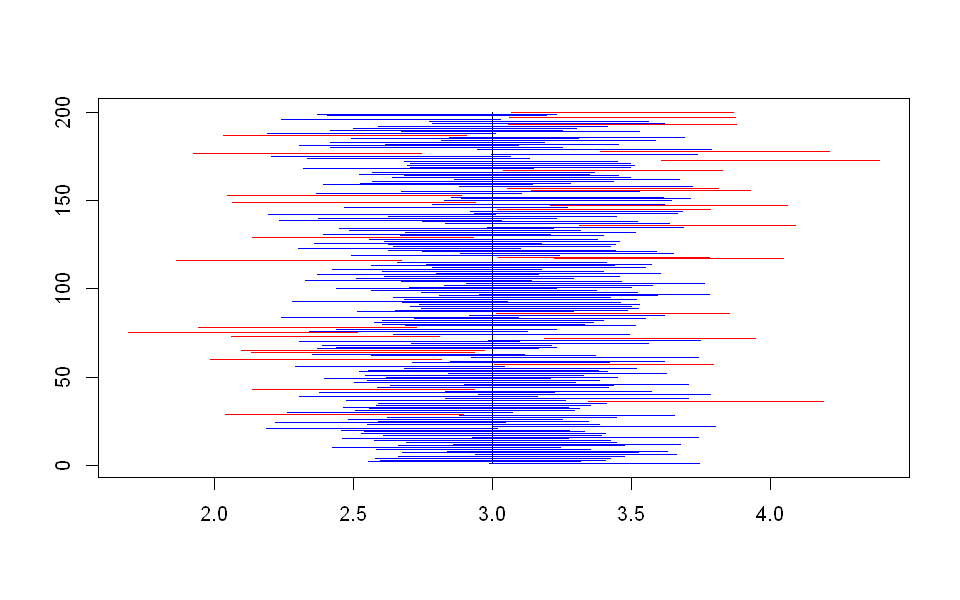

In [7]:
#CÓDIGO 3
k<-200
val<-list()
val[[1]]<-matrix(0,nrow=k,ncol=3)
alpha<-0.1
z_a<-qnorm(1-alpha/2)
sigma<-c()
med<-c()
for(i in 1:k){
  poi1<-rpois(30,3) 
  vec1<-thetas(k,poi)  
  val[[1]][i,1]<-mean(poi1)
  med[i]<-val[[1]][i,1]
  sigma[i]=estandar(vec1)
  val[[1]][i,2]<-val[[1]][i,1]+(z_a*(sigma[i])) # lim sup del int
  val[[1]][i,3]<-val[[1]][i,1]-(z_a*(sigma[i])) 
}

mu<-lambda
cont=0
par(mfrow=c(1,1))
data<-val[[1]]
options(repr.plot.width=8, repr.plot.height=5)
plot(seq(min(c(data[,3])),max(c(data[,2])),l=k), seq(1:k), type="n", xlab=c(""), ylab=c(""))
for(i in 1:nrow(data)){  
  segments(mu[i],1,mu[i],k)
  if(mu>data[i,3]&mu<data[i,2]){
    segments(data[i,3],i,data[i,2],i, col="blue")
    cont=cont+1
  }else (
    segments(data[i,3],i,data[i,2],i, col="red"))
}
cont=(cont/k)*100       
print("el porcentaje de la veces que intervalo atrapa al parametro es")
cont 
    

In [37]:
mu<-2
sigma2<-1
norm<-rnorm(30,mu,sigma)
#la esperanza es 
mu_m<-mean(norm)
gX<-exp(mu)
var1<-sigma2*((gX)^2)
var1

[1] 1.819938

In [36]:
lognorm<-exp(norm)
var(lognorm)

[1] 3.995777